In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [4]:
dataset = pd.read_csv("../Datasets/CustomerChurn.csv.xls")

In [5]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
dataset.shape

(7043, 21)

In [7]:
dataset.drop('customerID',axis='columns',inplace=True)

In [8]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
dataset.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
pd.to_numeric(dataset.TotalCharges,errors="coerce" ) #as TotalCharges is an object type

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:

dataset[pd.to_numeric(dataset.TotalCharges,errors="coerce" ).isnull()]



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
#drop those rows
df = dataset[dataset.TotalCharges!=" "]

In [13]:
dataset.shape

(7043, 20)

In [14]:
df.shape #11 rows dropped

(7032, 20)

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_60342/680514069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges)


In [17]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Text(0.5, 1.0, 'Tenure/Churn Relation')

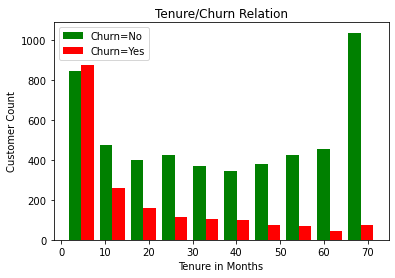

In [18]:
#visualization
tenure_no=df[df.Churn=='No'].tenure
tenure_yes = df[df.Churn=='Yes'].tenure


#plotting
plt.hist([tenure_no,tenure_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('Tenure in Months')
plt.ylabel('Customer Count')
plt.title('Tenure/Churn Relation')

Text(0.5, 1.0, 'Monthly Charges/Churn Relation')

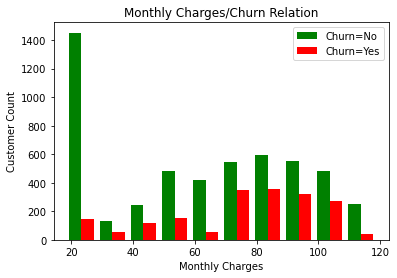

In [19]:
#visualization
monthly_no=df[df.Churn=='No'].MonthlyCharges
monthly_yes = df[df.Churn=='Yes'].MonthlyCharges


#plotting
plt.hist([monthly_no,monthly_yes],color=['green','red'],label=['Churn=No','Churn=Yes'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Customer Count')
plt.title('Monthly Charges/Churn Relation')

In [20]:
#unique features
def unique_feature():
    for column in df:
        if df[column].dtype == 'object':
            print(f"{column}: {df[column].unique()}")

In [21]:
df.replace("No phone service",'No',inplace=True)
df.replace("No internet service",'No',inplace=True)



/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_60342/2646061905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("No phone service",'No',inplace=True)
/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_60342/2646061905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("No internet service",'No',inplace=True)


In [22]:
unique_feature()

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
#feTURES WITH YES/NO VALUES
yes_no_features = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [24]:
for column in yes_no_features:
    
    df[column].replace({'Yes':1,'No':0},inplace=True)
 
        

/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_60342/1508526944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].replace({'Yes':1,'No':0},inplace=True)


In [25]:
unique_feature()

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
df.replace({'Female':0,'Male':1},inplace=True)

/var/folders/r_/4cb9y_793r90gb8_tcy2ywlr0000gn/T/ipykernel_60342/4220174198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Female':0,'Male':1},inplace=True)


In [27]:
unique_feature()

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [28]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [29]:
df1= pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [30]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [31]:
df1.dtypes


gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                uint8
InternetService_No                         uint8
Contract_One year                          uint8
Contract_Two year   

In [32]:
features_scalable= ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df1[features_scalable]= sc.fit_transform(df1[features_scalable])

In [33]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [34]:
y= df1['Churn']
X = df1.drop('Churn',axis='columns')

In [35]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [36]:
def Ann(X_train,X_test,y_train,y_test,epochs,weights):
    model = keras.Sequential([
    keras.layers.Dense(23,input_shape=(23,),activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    
])
    model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)
    if weights == -1:
        model.fit(X_train,y_train,epochs = epochs)
    else:
        model.fit(X_train,y_train,epochs = epochs,class_weight=weights)
        
    print(model.evaluate(X_test,y_test))
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    print(f"classification Report: {classification_report(y_test,y_pred)}")
    return y_pred

# Normal

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
y_preds=Ann(X_train,X_test,y_train,y_test,100,-1)

2022-07-18 23:47:19.609726: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-18 23:47:19.614916: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
176/176 [==============================] - 0s 516us/step - loss: 0.5245 - accuracy: 0.7422
Epoch 2/100
176/176 [==============================] - 0s 490us/step - loss: 0.4228 - accuracy: 0.8054
Epoch 3/100
176/176 [==============================] - 0s 485us/step - loss: 0.4219 - accuracy: 0.7970
Epoch 4/100
176/176 [==============================] - 0s

176/176 [==============================] - 0s 498us/step - loss: 0.1280 - accuracy: 0.9406
Epoch 72/100
176/176 [==============================] - 0s 459us/step - loss: 0.1271 - accuracy: 0.9388
Epoch 73/100
176/176 [==============================] - 0s 429us/step - loss: 0.1435 - accuracy: 0.9370
Epoch 74/100
176/176 [==============================] - 0s 431us/step - loss: 0.1217 - accuracy: 0.9451
Epoch 75/100
176/176 [==============================] - 0s 429us/step - loss: 0.1182 - accuracy: 0.9449
Epoch 76/100
176/176 [==============================] - 0s 429us/step - loss: 0.1211 - accuracy: 0.9398
Epoch 77/100
176/176 [==============================] - 0s 442us/step - loss: 0.1323 - accuracy: 0.9344
Epoch 78/100
176/176 [==============================] - 0s 445us/step - loss: 0.1163 - accuracy: 0.9457
Epoch 79/100
176/176 [==============================] - 0s 443us/step - loss: 0.1321 - accuracy: 0.9412
Epoch 80/100
176/176 [==============================] - 0s 417us/step - loss:

# Balancing

## Undersampling

In [39]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [40]:
count_0,count_1=df1.Churn.value_counts()
df1_0=df1[df1['Churn']==0]
df1_1=df1[df1['Churn']==1]

In [41]:
df1_0_new = df1_0.sample(count_1)

In [42]:
df_new=pd.concat([df1_1,df1_0_new],axis=0)

In [43]:
y= df_new['Churn']
X = df_new.drop('Churn',axis='columns')

In [44]:
y.shape

(3738,)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
X_train.shape

(2990, 23)

In [47]:
y_train.shape

(2990,)

In [48]:
y_preds=Ann(X_train,X_test,y_train,y_test,100,-1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 504us/step - loss: 0.5958 - accuracy: 0.6929
Epoch 2/100
94/94 [==============================] - 0s 447us/step - loss: 0.5045 - accuracy: 0.7643
Epoch 3/100
94/94 [==============================] - 0s 441us/step - loss: 0.4878 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 439us/s

94/94 [==============================] - 0s 438us/step - loss: 0.1319 - accuracy: 0.9348
Epoch 73/100
94/94 [==============================] - 0s 448us/step - loss: 0.1225 - accuracy: 0.9419
Epoch 74/100
94/94 [==============================] - 0s 429us/step - loss: 0.1215 - accuracy: 0.9439
Epoch 75/100
94/94 [==============================] - 0s 428us/step - loss: 0.1231 - accuracy: 0.9479
Epoch 76/100
94/94 [==============================] - 0s 432us/step - loss: 0.1334 - accuracy: 0.9413
Epoch 77/100
94/94 [==============================] - 0s 424us/step - loss: 0.1103 - accuracy: 0.9486
Epoch 78/100
94/94 [==============================] - 0s 419us/step - loss: 0.1066 - accuracy: 0.9524
Epoch 79/100
94/94 [==============================] - 0s 438us/step - loss: 0.1238 - accuracy: 0.9396
Epoch 80/100
94/94 [==============================] - 0s 490us/step - loss: 0.1251 - accuracy: 0.9478
Epoch 81/100
94/94 [==============================] - 0s 485us/step - loss: 0.1035 - accuracy: 

## Oversampling


In [49]:
#count_0,count_1=df1.Churn.value_counts()
#df1_0=df1[df1['Churn']==0]
#df1_1=df1[df1['Churn']==1]

In [50]:
df1_1_new1= df1_1.sample(count_0,replace=True)
df1_1_new1.shape


(5163, 24)

In [51]:
df_new_over=pd.concat([df1_1_new1,df1_0],axis=0)

In [52]:

y= df_new_over['Churn']
X = df_new_over.drop('Churn',axis='columns')

In [53]:
y.shape


(10326,)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [55]:
X_train.shape

(8260, 23)

In [56]:
y_train.shape

(8260,)

In [57]:
y_preds=Ann(X_train,X_test,y_train,y_test,100,-1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
259/259 [==============================] - 0s 449us/step - loss: 0.5739 - accuracy: 0.6942
Epoch 2/100
259/259 [==============================] - 0s 426us/step - loss: 0.4796 - accuracy: 0.7761
Epoch 3/100
259/259 [==============================] - 0s 421us/step - loss: 0.4738 - accuracy: 0.7745
Epoch 4/100
259/259 [==============================] - 0s

259/259 [==============================] - 0s 424us/step - loss: 0.1297 - accuracy: 0.9446
Epoch 72/100
259/259 [==============================] - 0s 423us/step - loss: 0.1125 - accuracy: 0.9518
Epoch 73/100
259/259 [==============================] - 0s 421us/step - loss: 0.1256 - accuracy: 0.9476
Epoch 74/100
259/259 [==============================] - 0s 425us/step - loss: 0.1253 - accuracy: 0.9467
Epoch 75/100
259/259 [==============================] - 0s 422us/step - loss: 0.1251 - accuracy: 0.9446
Epoch 76/100
259/259 [==============================] - 0s 421us/step - loss: 0.1337 - accuracy: 0.9445
Epoch 77/100
259/259 [==============================] - 0s 420us/step - loss: 0.1344 - accuracy: 0.9401
Epoch 78/100
259/259 [==============================] - 0s 414us/step - loss: 0.1398 - accuracy: 0.9350
Epoch 79/100
259/259 [==============================] - 0s 412us/step - loss: 0.1368 - accuracy: 0.9421
Epoch 80/100
259/259 [==============================] - 0s 407us/step - loss:

## SMOTE

In [59]:
y= df1['Churn']
X = df1.drop('Churn',axis='columns')

In [60]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')
X_sm ,y_sm = smote.fit_resample(X,y)

In [76]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0
                                                   )

In [71]:
X_train.shape

(8260, 23)

In [72]:
y_train.value_counts(
)

1    4130
0    4130
Name: Churn, dtype: int64

In [74]:
y_preds=Ann(X_train,X_test,y_train,y_test,100,-1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
259/259 [==============================] - 0s 441us/step - loss: 0.5562 - accuracy: 0.7157
Epoch 2/100
259/259 [==============================] - 0s 413us/step - loss: 0.4728 - accuracy: 0.7746
Epoch 3/100
259/259 [==============================] - 0s 426us/step - loss: 0.4483 - accuracy: 0.7875
Epoch 4/100
259/259 [==============================] - 0s

259/259 [==============================] - 0s 422us/step - loss: 0.1473 - accuracy: 0.9399
Epoch 72/100
259/259 [==============================] - 0s 427us/step - loss: 0.1466 - accuracy: 0.9384
Epoch 73/100
259/259 [==============================] - 0s 440us/step - loss: 0.1585 - accuracy: 0.9348
Epoch 74/100
259/259 [==============================] - 0s 417us/step - loss: 0.1452 - accuracy: 0.9378
Epoch 75/100
259/259 [==============================] - 0s 415us/step - loss: 0.1661 - accuracy: 0.9336
Epoch 76/100
259/259 [==============================] - 0s 417us/step - loss: 0.1415 - accuracy: 0.9402
Epoch 77/100
259/259 [==============================] - 0s 407us/step - loss: 0.1531 - accuracy: 0.9365
Epoch 78/100
259/259 [==============================] - 0s 408us/step - loss: 0.1425 - accuracy: 0.9456
Epoch 79/100
259/259 [==============================] - 0s 428us/step - loss: 0.1441 - accuracy: 0.9366
Epoch 80/100
259/259 [==============================] - 0s 420us/step - loss:

## Using Ensemble with Undersampling

In [78]:
y= df1['Churn']
X = df1.drop('Churn',axis='columns')

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [82]:
y_train.value_counts(
)

0    4130
1    1495
Name: Churn, dtype: int64

In [83]:
df2 = X_train.copy()
df2['Churn']=y_train.copy()

In [85]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
4140,0,0,0,0,0.873239,1,1,0,1,0,...,0.812438,0.706000,1,0,1,0,0,0,0,1
5089,1,0,1,1,0.098592,1,0,0,0,0,...,0.359701,0.052654,0,0,0,0,0,1,0,0
4751,1,0,0,0,0.140845,1,1,0,0,0,...,0.048756,0.026125,0,1,0,0,1,0,0,1
6622,1,0,0,0,0.014085,1,1,0,0,0,...,0.435821,0.011482,0,0,0,0,0,0,0,1
5430,1,0,0,0,0.126761,1,1,0,0,0,...,0.536318,0.089482,0,0,0,0,1,0,0,1


In [89]:
df2_0 = df2[df2['Churn']==0]
df2_1 = df2[df2['Churn']==1]
df2_0.shape,df2_1.shape


((4130, 24), (1495, 24))

In [91]:
def train_batch(start,end,df2_0,df2_1):
    df3 = pd.concat([df2_0[start:end],df2_1],axis = 0)
    y_train= df3['Churn']
    X_train= df3.drop('Churn',axis='columns')
    return X_train,y_train

In [96]:
#Batch 1
X_train,y_train = train_batch(0,1495,df2_0,df2_1)
y_pred1=Ann(X_train,X_test,y_train,y_test,100,-1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 508us/step - loss: 0.5912 - accuracy: 0.7006
Epoch 2/100
94/94 [==============================] - 0s 482us/step - loss: 0.4858 - accuracy: 0.7736
Epoch 3/100
94/94 [==============================] - 0s 462us/step - loss: 0.4725 - accuracy: 0.7740
Epoch 4/100
94/94 [==============================] - 0s 464us/s

94/94 [==============================] - 0s 437us/step - loss: 0.1059 - accuracy: 0.9512
Epoch 73/100
94/94 [==============================] - 0s 446us/step - loss: 0.1016 - accuracy: 0.9498
Epoch 74/100
94/94 [==============================] - 0s 424us/step - loss: 0.1225 - accuracy: 0.9480
Epoch 75/100
94/94 [==============================] - 0s 444us/step - loss: 0.1239 - accuracy: 0.9470
Epoch 76/100
94/94 [==============================] - 0s 441us/step - loss: 0.0938 - accuracy: 0.9576
Epoch 77/100
94/94 [==============================] - 0s 446us/step - loss: 0.1069 - accuracy: 0.9537
Epoch 78/100
94/94 [==============================] - 0s 436us/step - loss: 0.1121 - accuracy: 0.9554
Epoch 79/100
94/94 [==============================] - 0s 427us/step - loss: 0.1178 - accuracy: 0.9429
Epoch 80/100
94/94 [==============================] - 0s 428us/step - loss: 0.0945 - accuracy: 0.9578
Epoch 81/100
94/94 [==============================] - 0s 435us/step - loss: 0.1025 - accuracy: 

In [97]:
#Batch 2
X_train,y_train = train_batch(1495,2990,df2_0,df2_1)
y_pred2=Ann(X_train,X_test,y_train,y_test,100,-1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
94/94 [==============================] - 0s 477us/step - loss: 0.6271 - accuracy: 0.6521
Epoch 2/100
94/94 [==============================] - 0s 422us/step - loss: 0.5377 - accuracy: 0.7212
Epoch 3/100
94/94 [==============================] - 0s 428us/step - loss: 0.5255 - accuracy: 0.7451
Epoch 4/100
94/94 [==============================] - 0s 447us/s

94/94 [==============================] - 0s 418us/step - loss: 0.1263 - accuracy: 0.9493
Epoch 73/100
94/94 [==============================] - 0s 417us/step - loss: 0.1314 - accuracy: 0.9423
Epoch 74/100
94/94 [==============================] - 0s 414us/step - loss: 0.1216 - accuracy: 0.9494
Epoch 75/100
94/94 [==============================] - 0s 418us/step - loss: 0.1324 - accuracy: 0.9443
Epoch 76/100
94/94 [==============================] - 0s 414us/step - loss: 0.1352 - accuracy: 0.9398
Epoch 77/100
94/94 [==============================] - 0s 425us/step - loss: 0.1479 - accuracy: 0.9353
Epoch 78/100
94/94 [==============================] - 0s 416us/step - loss: 0.1509 - accuracy: 0.9304
Epoch 79/100
94/94 [==============================] - 0s 418us/step - loss: 0.1255 - accuracy: 0.9428
Epoch 80/100
94/94 [==============================] - 0s 415us/step - loss: 0.1391 - accuracy: 0.9360
Epoch 81/100
94/94 [==============================] - 0s 413us/step - loss: 0.1196 - accuracy: 

In [95]:
#Batch 3
X_train,y_train = train_batch(2990,4130,df2_0,df2_1)
y_preds=Ann(X_train,X_test,y_train,y_test,100,-1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
83/83 [==============================] - 0s 492us/step - loss: 0.6085 - accuracy: 0.6587
Epoch 2/100
83/83 [==============================] - 0s 463us/step - loss: 0.5215 - accuracy: 0.7426
Epoch 3/100
83/83 [==============================] - 0s 461us/step - loss: 0.4889 - accuracy: 0.7720
Epoch 4/100
83/83 [==============================] - 0s 474us/s

83/83 [==============================] - 0s 448us/step - loss: 0.1104 - accuracy: 0.9508
Epoch 73/100
83/83 [==============================] - 0s 439us/step - loss: 0.1158 - accuracy: 0.9527
Epoch 74/100
83/83 [==============================] - 0s 427us/step - loss: 0.1379 - accuracy: 0.9460
Epoch 75/100
83/83 [==============================] - 0s 435us/step - loss: 0.1093 - accuracy: 0.9508
Epoch 76/100
83/83 [==============================] - 0s 425us/step - loss: 0.1155 - accuracy: 0.9503
Epoch 77/100
83/83 [==============================] - 0s 424us/step - loss: 0.1030 - accuracy: 0.9469
Epoch 78/100
83/83 [==============================] - 0s 419us/step - loss: 0.1206 - accuracy: 0.9450
Epoch 79/100
83/83 [==============================] - 0s 418us/step - loss: 0.1155 - accuracy: 0.9495
Epoch 80/100
83/83 [==============================] - 0s 418us/step - loss: 0.1140 - accuracy: 0.9488
Epoch 81/100
83/83 [==============================] - 0s 421us/step - loss: 0.0985 - accuracy: 

In [100]:
y_predf = y_pred1.copy()
for i in range(len(y_pred1)):
    ones = y_pred1[i]+y_pred2[i]+y_preds[i]
    if ones>1:
        y_predf[i] = 1
    else:
        y_predf[i] = 0

In [101]:
print(classification_report(y_test,y_predf))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1033
           1       0.46      0.73      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.77      0.70      0.72      1407

